## **Estudiante:**

*   Emanuel Acevedo Muñoz




## **El entregable debe contener.**

1. Verifique que la BD tenga el formato correcto. En caso de que no tenga el formato csv
correcto, usted deberá efectuar el procedimiento visto en clase, antes de subir la BD al
entorno de ejecución.
2. Lea la base de datos por medio del entorno de ejecución.
3. Eliminar el (o los) atributos que consideren irrelevantes, justificando por qué.
4. Se deben transformar los atributos categóricos a numéricos
5. Normalizar los datos.
6. Definir el número de clústeres (puede ser basado en el criterio del codo o en otro criterio,
por ejemplo, por el contexto).
7. (Consulta sobre el índice de silueta como criterio para la selección de clústeres y aplícalo.
¿Este resultado comprueba el número anterior hallado?
8. Desnormalizar los datos y describir cada grupo hallado y darle un nombre. Por ejemplo: “El
grupo plata: en este grupo, la mayoría son hombres de mediana edad, solteros, con ingresos
promedio de..., etc”.
9. Basado en estos grupos formados, formule una estrategia diferencial para cada uno de
ellos con base en los resultados. Por ejemplo: “Dado que en el grupo plata, la mayoría son
solteros de mediana edad, se les propondría…


### **Nuestra variable objetivo**
Cree un modelo de clustering con el fin de crear diferentes perfiles de clientes

In [85]:
import pickle
import pandas as pd #Manejo de dataframes
import numpy as np #Manejo de listas
import matplotlib.pyplot as plt #Graficación
import seaborn as sns #Graficación

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans # Importamos de KMeans solo una parte de la libreria para no hacer muy pesado del proyecto
from sklearn.decomposition import PCA

In [86]:
# Cargamos los datos, utilizamos encoding latin-1 para leer valores en español
df = pd.read_csv('bdclientes1.csv')
df.head()

,IDCLIENTE,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos,Estudios,Estado_civil
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married


### Analisis exploratorio de datos

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   IDCLIENTE           438557 non-null  int64  
 1   Genero              438557 non-null  object 
 2   Tiene_auto          438557 non-null  int64  
 3   Tiene_propiedad     438557 non-null  int64  
 4   Num_hijos           438557 non-null  int64  
 5   Ingreso_anual       438557 non-null  float64
 6   Categoria_ingresos  438557 non-null  object 
 7   Estudios            438557 non-null  object 
 8   Estado_civil        438557 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 30.1+ MB


In [88]:
df.describe()

,IDCLIENTE,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual
count,4.385570e+05,438557.000000,438557.000000,438557.000000,4.385570e+05
mean,6.022176e+06,0.371897,0.693351,0.427390,1.875243e+05
std,5.716370e+05,0.483312,0.461103,0.724882,1.100869e+05
min,5.008804e+06,0.000000,0.000000,0.000000,2.610000e+04
25%,5.609375e+06,0.000000,0.000000,0.000000,1.215000e+05
50%,6.047745e+06,0.000000,1.000000,0.000000,1.607805e+05
75%,6.456971e+06,1.000000,1.000000,1.000000,2.250000e+05
max,7.999952e+06,1.000000,1.000000,19.000000,6.750000e+06


<Axes: xlabel='Tiene_propiedad', ylabel='count'>

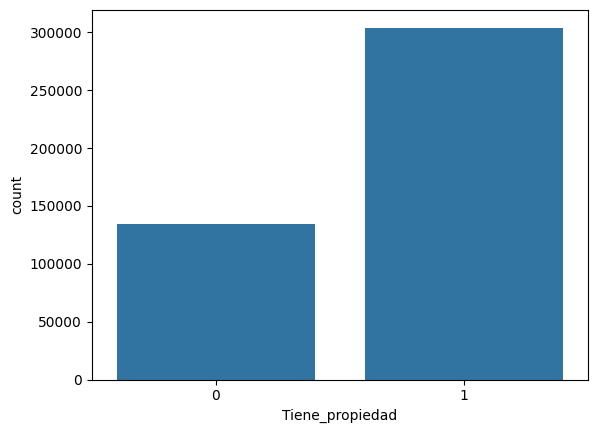

In [89]:
# Grafico de casos de Genero
sns.countplot(x='Tiene_propiedad', data=df)

<Axes: xlabel='Num_hijos', ylabel='count'>

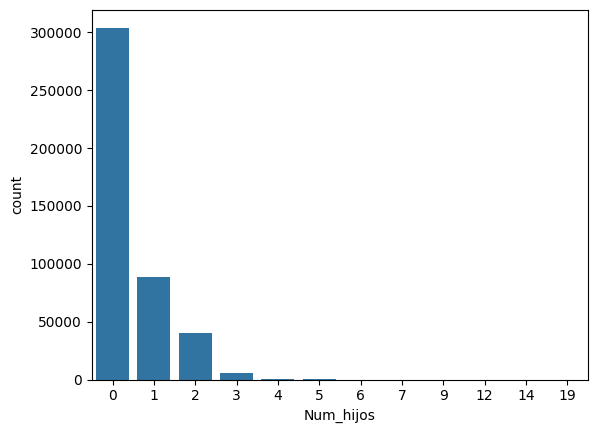

In [90]:
# Grafico de casos de Genero
sns.countplot(x='Num_hijos', data=df)

<Axes: xlabel='Ingreso_anual'>

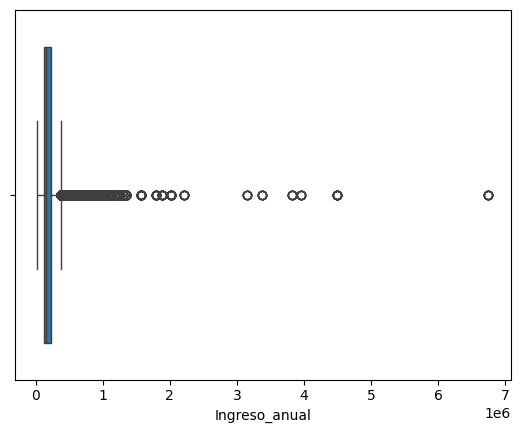

In [91]:
sns.boxplot(x='Ingreso_anual', data=df)

In [92]:
df[df["Ingreso_anual"] == df["Ingreso_anual"].max()]

,IDCLIENTE,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos,Estudios,Estado_civil
228159,5987963,M,1,0,0,6750000.0,Working,Higher education,Married
228160,5987964,M,1,0,0,6750000.0,Working,Higher education,Married
228161,5987966,M,1,0,0,6750000.0,Working,Higher education,Married
228162,5987967,M,1,0,0,6750000.0,Working,Higher education,Married
228163,5987968,M,1,0,0,6750000.0,Working,Higher education,Married
228164,5987969,M,1,0,0,6750000.0,Working,Higher education,Married
421262,7987964,M,1,0,0,6750000.0,Working,Higher education,Married


In [93]:
# Genero
df['Genero'].value_counts()

,count
Genero,
F,294440
M,144117


<Axes: xlabel='Genero', ylabel='count'>

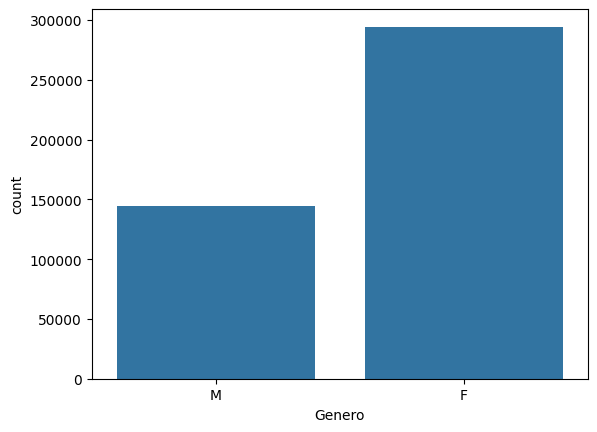

In [94]:
# Grafico de casos de Genero
sns.countplot(x='Genero', data=df)

In [95]:
# Categoria_ingresos
df['Categoria_ingresos'].value_counts()

,count
Categoria_ingresos,
Working,226104
Commercial associate,100757
Pensioner,75493
State servant,36186
Student,17


<Axes: xlabel='Categoria_ingresos', ylabel='count'>

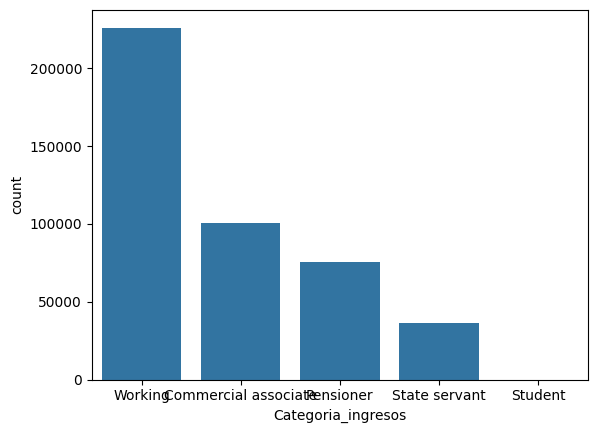

In [96]:
# Grafico de casos de Categoria_ingresos
sns.countplot(x='Categoria_ingresos', data=df)

In [97]:
# Estudios
df['Estudios'].value_counts()

,count
Estudios,
Secondary / secondary special,301821
Higher education,117522
Incomplete higher,14851
Lower secondary,4051
Academic degree,312


<Axes: xlabel='Estudios', ylabel='count'>

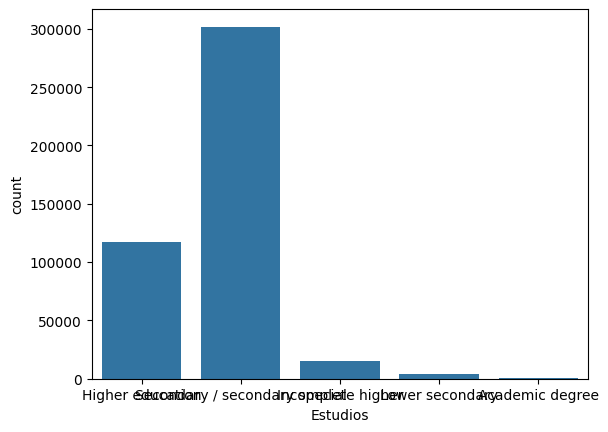

In [98]:
# Grafico de casos de Estudios
sns.countplot(x='Estudios', data=df)

In [99]:
# Estado_civil
df['Estado_civil'].value_counts()

,count
Estado_civil,
Married,299828
Single / not married,55271
Civil marriage,36532
Separated,27251
Widow,19675


<Axes: xlabel='Estado_civil', ylabel='count'>

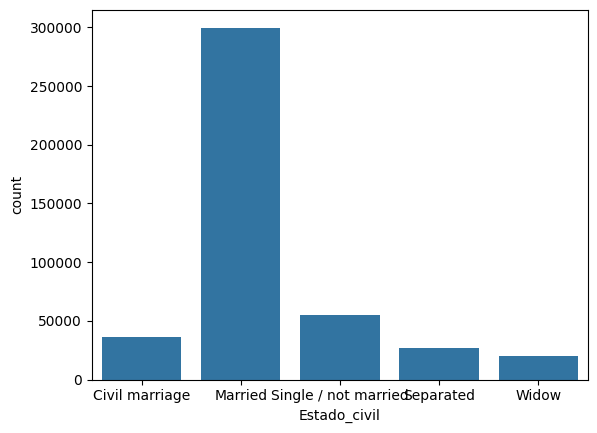

In [100]:
# Grafico de casos de Estado_civil
sns.countplot(x='Estado_civil', data=df)

### **Imputación de nulos**

In [101]:
# Revisemos los nulos que tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   IDCLIENTE           438557 non-null  int64  
 1   Genero              438557 non-null  object 
 2   Tiene_auto          438557 non-null  int64  
 3   Tiene_propiedad     438557 non-null  int64  
 4   Num_hijos           438557 non-null  int64  
 5   Ingreso_anual       438557 non-null  float64
 6   Categoria_ingresos  438557 non-null  object 
 7   Estudios            438557 non-null  object 
 8   Estado_civil        438557 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 30.1+ MB


#### **Revisión de variables redundantes (consultar la matriz de correlación)**

#### Encontramos que las variables en la matriz de correlacion no estan correlacionada lo suficiente. Esto es un buen indicio para el analisis.

In [102]:
df.corr(numeric_only=True)

,IDCLIENTE,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual
IDCLIENTE,1.000000,0.000063,0.042709,-0.005178,0.011179
Tiene_auto,0.000063,1.000000,-0.001312,0.115138,0.188203
Tiene_propiedad,0.042709,-0.001312,1.000000,0.001560,0.025443
Num_hijos,-0.005178,0.115138,0.001560,1.000000,0.019177
Ingreso_anual,0.011179,0.188203,0.025443,0.019177,1.000000


**Eliminamos columnas identificadoras no necesarias**

In [103]:
df.columns

Index(['IDCLIENTE', 'Genero', 'Tiene_auto', 'Tiene_propiedad', 'Num_hijos',
       'Ingreso_anual', 'Categoria_ingresos', 'Estudios', 'Estado_civil'],
      dtype='object')

In [104]:
columnas = ['Genero', 'Tiene_auto', 'Tiene_propiedad', 'Num_hijos', 'Ingreso_anual', 'Categoria_ingresos', 'Estudios', 'Estado_civil']
df = df[columnas]

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Genero              438557 non-null  object 
 1   Tiene_auto          438557 non-null  int64  
 2   Tiene_propiedad     438557 non-null  int64  
 3   Num_hijos           438557 non-null  int64  
 4   Ingreso_anual       438557 non-null  float64
 5   Categoria_ingresos  438557 non-null  object 
 6   Estudios            438557 non-null  object 
 7   Estado_civil        438557 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 26.8+ MB


#### **Transformaciones que consideren necesarias para las variables categóricas, dummies, normalización, etc.**

In [106]:
df.head()

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos,Estudios,Estado_civil
0,M,1,1,0,427500.0,Working,Higher education,Civil marriage
1,M,1,1,0,427500.0,Working,Higher education,Civil marriage
2,M,1,1,0,112500.0,Working,Secondary / secondary special,Married
3,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married
4,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married


In [107]:
# Creamos variables dummy para convertir
columnas = ["Categoria_ingresos", "Estudios", "Estado_civil"]
df = pd.get_dummies(data=df, columns=columnas)

In [108]:
# Se codifican las categorias de la VARIABLE A PREDECIR (OBJETIVO)
labelencoder = LabelEncoder()
# Reemplaza las categorias por un numero ordenado
df["Genero"] = labelencoder.fit_transform(df["Genero"])

In [109]:
df.head()

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estudios_Academic degree,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,1,1,1,0,427500.0,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False
1,1,1,1,0,427500.0,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False
2,1,1,1,0,112500.0,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
3,0,0,1,0,270000.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0,0,1,0,270000.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Genero                                   438557 non-null  int64  
 1   Tiene_auto                               438557 non-null  int64  
 2   Tiene_propiedad                          438557 non-null  int64  
 3   Num_hijos                                438557 non-null  int64  
 4   Ingreso_anual                            438557 non-null  float64
 5   Categoria_ingresos_Commercial associate  438557 non-null  bool   
 6   Categoria_ingresos_Pensioner             438557 non-null  bool   
 7   Categoria_ingresos_State servant         438557 non-null  bool   
 8   Categoria_ingresos_Student               438557 non-null  bool   
 9   Categoria_ingresos_Working               438557 non-null  bool   
 10  Estudios_Academic degree        

In [111]:
# Convertir los True o False a 1 o 0
df = df*1

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Genero                                   438557 non-null  int64  
 1   Tiene_auto                               438557 non-null  int64  
 2   Tiene_propiedad                          438557 non-null  int64  
 3   Num_hijos                                438557 non-null  int64  
 4   Ingreso_anual                            438557 non-null  float64
 5   Categoria_ingresos_Commercial associate  438557 non-null  int64  
 6   Categoria_ingresos_Pensioner             438557 non-null  int64  
 7   Categoria_ingresos_State servant         438557 non-null  int64  
 8   Categoria_ingresos_Student               438557 non-null  int64  
 9   Categoria_ingresos_Working               438557 non-null  int64  
 10  Estudios_Academic degree        

#### Normalizacion Min Max

In [113]:
# Se crea un nuevo DataFrame
# Esta es una forma en la que podemos normalizar una base de datos para darles el mismo peso a las variables
# El valor más alto queda con un 1 y el más bajo con un 0.
df_mean_norm=(df-df.min()) / (df.max() - df.min())

In [114]:
# Datos normalizados de 0 a 1 para cada uno de las columnas de la base de datos
df_mean_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Genero                                   438557 non-null  float64
 1   Tiene_auto                               438557 non-null  float64
 2   Tiene_propiedad                          438557 non-null  float64
 3   Num_hijos                                438557 non-null  float64
 4   Ingreso_anual                            438557 non-null  float64
 5   Categoria_ingresos_Commercial associate  438557 non-null  float64
 6   Categoria_ingresos_Pensioner             438557 non-null  float64
 7   Categoria_ingresos_State servant         438557 non-null  float64
 8   Categoria_ingresos_Student               438557 non-null  float64
 9   Categoria_ingresos_Working               438557 non-null  float64
 10  Estudios_Academic degree        

In [115]:
df_mean_norm

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estudios_Academic degree,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,1.0,1.0,1.0,0.0,0.059697,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.059697,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.012850,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.036274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.036274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1.0,0.0,1.0,0.0,0.016196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
438553,0.0,0.0,0.0,0.0,0.011511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
438554,0.0,0.0,0.0,0.0,0.004149,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
438555,0.0,0.0,1.0,0.0,0.006826,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Busqueda del número cluster optimo

In [116]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=1000)
  # salida=funcion(arg1,arg2,...)
  kmeans.fit(df_mean_norm)
  wcss.append(kmeans.inertia_) # inertia_ es la cantidad de error de cada una de las iteraciones

In [117]:
np.array(wcss)

array([995851.40759087, 877797.93956655, 740165.08025191, 653629.38085431,
       668719.88573921, 574762.71533741, 542379.46919501, 514195.71543441,
       508736.76902754, 470163.8004893 ])

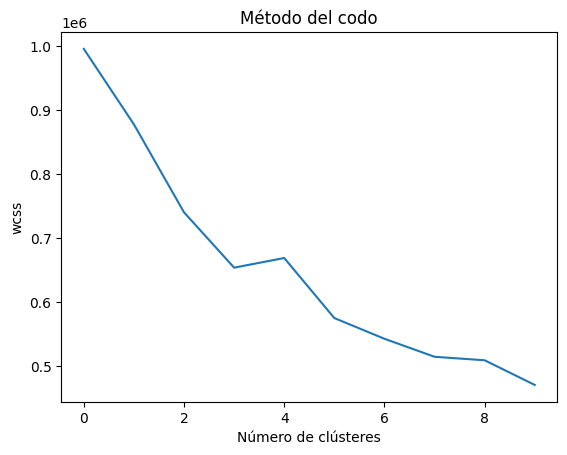

In [118]:
# Graficar
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("wcss")
plt.plot(np.array(wcss))
plt.show()

In [119]:
df_silhouette = df_mean_norm[::300]

In [120]:
df_silhouette

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estudios_Academic degree,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,1.0,1.0,1.0,0.0,0.059697,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
300,1.0,0.0,1.0,0.0,0.053005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
600,0.0,0.0,0.0,0.0,0.022889,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
900,0.0,1.0,0.0,0.0,0.010842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1200,0.0,0.0,1.0,0.0,0.016196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437100,0.0,0.0,0.0,0.0,0.016196,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
437400,0.0,0.0,1.0,0.0,0.007496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
437700,0.0,0.0,1.0,0.0,0.036274,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
438000,1.0,1.0,0.0,0.0,0.026235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


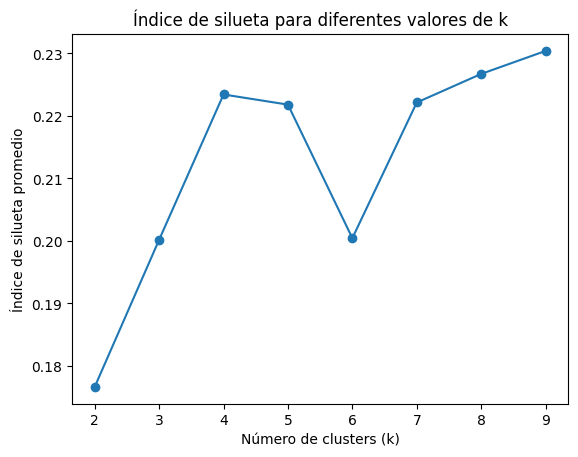

In [121]:
silhouette_scores = []
k_values = range(2, 10)  # Probar k desde 2 hasta 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_silhouette)
    score = silhouette_score(df_silhouette, labels)
    silhouette_scores.append(score)

# Graficar los resultados
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de silueta promedio')
plt.title('Índice de silueta para diferentes valores de k')
plt.show()

### Aplicando el clustering

In [122]:
clustering = KMeans(n_clusters=4, max_iter=1000)
clustering.fit(df_mean_norm)
y_kmeans = clustering.fit_predict(df_mean_norm)
clustering.cluster_centers_

array([[ 2.44686064e-01,  2.31383359e-01,  6.95742726e-01,
         1.29244244e-02,  2.21740155e-02,  1.94068402e-01,
         2.39806023e-01,  5.32210311e-02,  5.10464523e-05,
         5.12853497e-01,  7.96324655e-04, -5.02542452e-13,
         1.98672792e-02,  1.01276161e-02,  9.69208780e-01,
         2.72322614e-01, -3.11972670e-13,  1.93404798e-01,
         3.66401225e-01,  1.67871363e-01],
       [ 3.48941316e-01,  3.81550644e-01,  8.51935398e-01,
         2.42522140e-02,  2.15760997e-02,  2.38968408e-01,
         2.26056068e-01,  8.14855296e-02,  5.81375068e-06,
         4.53484181e-01,  6.97650082e-05, -9.84101689e-13,
         1.27321140e-03,  4.31380301e-03,  9.94343221e-01,
        -1.69683712e-13,  1.00000000e+00, -2.59028909e-13,
         2.99371639e-13, -1.95343741e-13],
       [ 3.21617915e-01,  4.33489319e-01,  6.90144628e-01,
         2.24007703e-02,  3.10176702e-02,  5.74611567e-01,
         1.85500403e-01,  2.39732515e-01,  1.55514399e-04,
        -5.53002089e-13,  1.5

In [123]:
df_mean_norm

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estudios_Academic degree,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,1.0,1.0,1.0,0.0,0.059697,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.059697,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.012850,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.036274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.036274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1.0,0.0,1.0,0.0,0.016196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
438553,0.0,0.0,0.0,0.0,0.011511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
438554,0.0,0.0,0.0,0.0,0.004149,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
438555,0.0,0.0,1.0,0.0,0.006826,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [124]:
# Obtener los centroides
centroides = clustering.cluster_centers_

# Crear un DataFrame con los centroides y los nombres de las columnas
centroides_df = pd.DataFrame(centroides, columns=df_mean_norm.columns)
centroides_df

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estudios_Academic degree,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,0.244686,0.231383,0.695743,0.012924,0.022174,1.940684e-01,2.398060e-01,5.322103e-02,5.104645e-05,5.128535e-01,0.000796,-5.025425e-13,0.019867,0.010128,9.692088e-01,2.723226e-01,-3.119727e-13,1.934048e-01,3.664012e-01,1.678714e-01
1,0.348941,0.381551,0.851935,0.024252,0.021576,2.389684e-01,2.260561e-01,8.148553e-02,5.813751e-06,4.534842e-01,0.000070,-9.841017e-13,0.001273,0.004314,9.943432e-01,-1.696837e-13,1.000000e+00,-2.590289e-13,2.993716e-13,-1.953437e-13
2,0.321618,0.433489,0.690145,0.022401,0.031018,5.746116e-01,1.855004e-01,2.397325e-01,1.555144e-04,-5.530021e-13,0.001583,9.048252e-01,0.081999,0.011593,-4.923839e-13,7.401072e-02,6.852954e-01,6.445365e-02,1.441477e-01,3.209252e-02
3,0.381953,0.451046,0.414558,0.029050,0.025049,-3.385348e-13,2.831901e-13,-1.377509e-13,-7.783216e-17,1.000000e+00,0.001124,5.468693e-01,0.070360,0.015296,3.663506e-01,4.723709e-02,8.107757e-01,3.829648e-02,9.386112e-02,9.829566e-03


Agregar la clasificación al archivo original

In [125]:
clustering.cluster_centers_[:, 1]

array([0.23138336, 0.38155064, 0.43348932, 0.45104631])

In [126]:
df['KMeans_Clusters'] = clustering.labels_

### Desnormalizacion

In [127]:
# Despejamos de la ecuación de normalización para obtener de nuevo los valores después de normalizarlos
# df_mean_norm=(bridge_df-bridge_df.min()) / (bridge_df.max() - bridge_df.min())
df_mean_desnormalizados = (df_mean_norm * (df.max() - df.min())) + df.min()

In [128]:
df_mean_desnormalizados.head()

,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow,...,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Genero,Ingreso_anual,KMeans_Clusters,Num_hijos,Tiene_auto,Tiene_propiedad
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,427500.0,NaN,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,427500.0,NaN,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,112500.0,NaN,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,270000.0,NaN,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,270000.0,NaN,0.0,0.0,1.0


In [129]:
# Agregamos el Clustering donde quedaron agrupados cada uno de los registros al resultado de la desmoralización.
df_mean_desnormalizados['KMeans_Clusters'] = clustering.labels_

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Genero                                   438557 non-null  int64  
 1   Tiene_auto                               438557 non-null  int64  
 2   Tiene_propiedad                          438557 non-null  int64  
 3   Num_hijos                                438557 non-null  int64  
 4   Ingreso_anual                            438557 non-null  float64
 5   Categoria_ingresos_Commercial associate  438557 non-null  int64  
 6   Categoria_ingresos_Pensioner             438557 non-null  int64  
 7   Categoria_ingresos_State servant         438557 non-null  int64  
 8   Categoria_ingresos_Student               438557 non-null  int64  
 9   Categoria_ingresos_Working               438557 non-null  int64  
 10  Estudios_Academic degree        

### Visualización

In [131]:
df.head()

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,...,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow,KMeans_Clusters
0,1,1,1,0,427500.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,3
1,1,1,1,0,427500.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,3
2,1,1,1,0,112500.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,0,1,0,270000.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,270000.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [132]:
# PCA (Análisis de Componentes Principales)
pca = PCA(n_components=4)
pca_credit = pca.fit_transform(df_mean_norm)
pca_credit_df = pd.DataFrame(data=pca_credit, columns=['Componente1', 'Componente2', 'Componente3', 'Componente4'])
pca_add=pd.concat([pca_credit_df, df['KMeans_Clusters']], axis=1)
pca_add.head()

,Componente1,Componente2,Componente3,Componente4,KMeans_Clusters
0,-0.863143,0.765374,0.622713,-0.704723,3
1,-0.863143,0.765374,0.622713,-0.704723,3
2,0.357786,1.021346,-0.437068,-0.144064,1
3,0.159355,-1.039121,0.041249,-0.794371,0
4,0.159355,-1.039121,0.041249,-0.794371,0


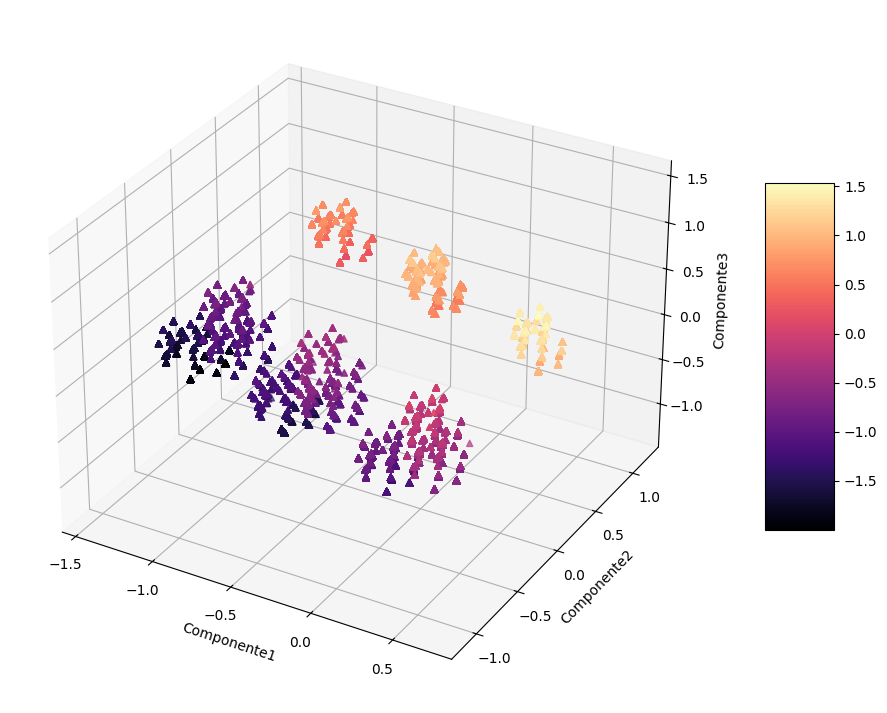

In [133]:

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(projection='3d')

my_cmap = plt.get_cmap('magma')
xs = pca_add.Componente1
ys = pca_add.Componente2
zs = pca_add.Componente3
sctt = ax.scatter(xs, ys, zs, c = (pca_add.Componente1 + pca_add.Componente2 + pca_add.Componente3), cmap = my_cmap,
                    marker ='^')

ax.set_xlabel("Componente1")
ax.set_ylabel("Componente2")
ax.set_zlabel("Componente3")
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

In [134]:
pca_add.head(20)

,Componente1,Componente2,Componente3,Componente4,KMeans_Clusters
0,-0.863143,0.765374,0.622713,-0.704723,3
1,-0.863143,0.765374,0.622713,-0.704723,3
2,0.357786,1.021346,-0.437068,-0.144064,1
3,0.159355,-1.039121,0.041249,-0.794371,0
4,0.159355,-1.039121,0.041249,-0.794371,0
5,0.159355,-1.039121,0.041249,-0.794371,0
6,0.159355,-1.039121,0.041249,-0.794371,0
7,-0.763889,-1.009233,0.669331,0.142303,2
8,-0.763889,-1.009233,0.669331,0.142303,2
9,-0.763889,-1.009233,0.669331,0.142303,2


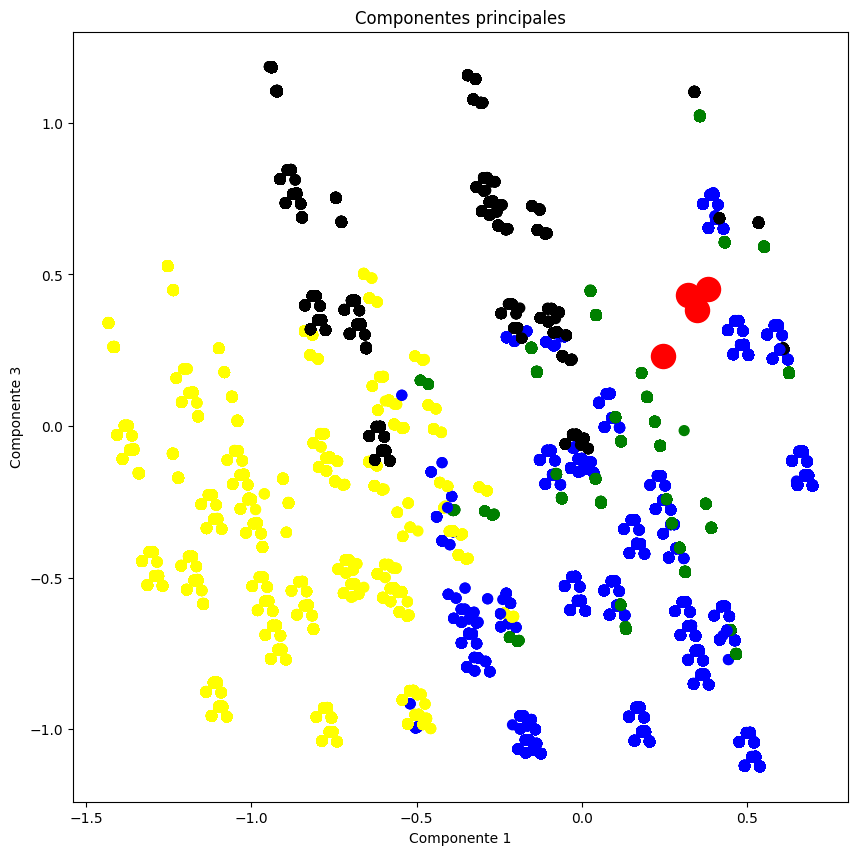

In [135]:
grafica = plt.figure(figsize=(10,10))
graf=grafica.add_subplot(1,1,1)
graf.set_xlabel("Componente 1")
graf.set_ylabel("Componente 2")
graf.set_ylabel("Componente 3")
graf.set_title("Componentes principales")

colores = np.array(["blue", "green", "yellow", "black"])

# Los puntos rojos son la ubicación de los centroides
graf.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], s=300,c = 'red', label = 'Centroids')
graf.scatter(x=pca_add.Componente1, y=pca_add.Componente2, c = colores[pca_add.KMeans_Clusters], s=50)


## CONCLUSIONES AL OBTENER LA AGRUPACIÓN
### Datos normalizados

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Genero                                   438557 non-null  int64  
 1   Tiene_auto                               438557 non-null  int64  
 2   Tiene_propiedad                          438557 non-null  int64  
 3   Num_hijos                                438557 non-null  int64  
 4   Ingreso_anual                            438557 non-null  float64
 5   Categoria_ingresos_Commercial associate  438557 non-null  int64  
 6   Categoria_ingresos_Pensioner             438557 non-null  int64  
 7   Categoria_ingresos_State servant         438557 non-null  int64  
 8   Categoria_ingresos_Student               438557 non-null  int64  
 9   Categoria_ingresos_Working               438557 non-null  int64  
 10  Estudios_Academic degree        

In [137]:
df['KMeans_Clusters'].value_counts()

,count
KMeans_Clusters,
1,172006
0,97950
3,97868
2,70733


<Axes: title={'center': 'Histograma de numero de hijos por clusters'}, xlabel='Num_hijos,KMeans_Clusters'>

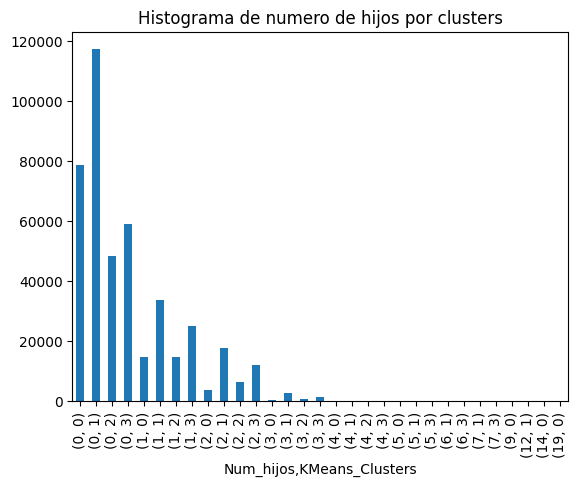

In [138]:
dataCredits = df.groupby(['Num_hijos', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de numero de hijos por clusters')

<Axes: title={'center': 'Histograma de Genero por clusters'}, xlabel='Genero,KMeans_Clusters'>

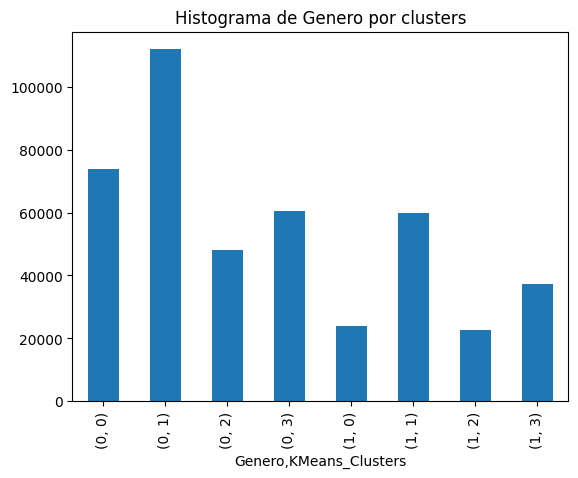

In [139]:
dataCredits = df.groupby(['Genero', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Genero por clusters')

<Axes: title={'center': 'Histograma de Tiene_auto y Tiene_propiedad por clusters'}, xlabel='Tiene_auto,Tiene_propiedad,KMeans_Clusters'>

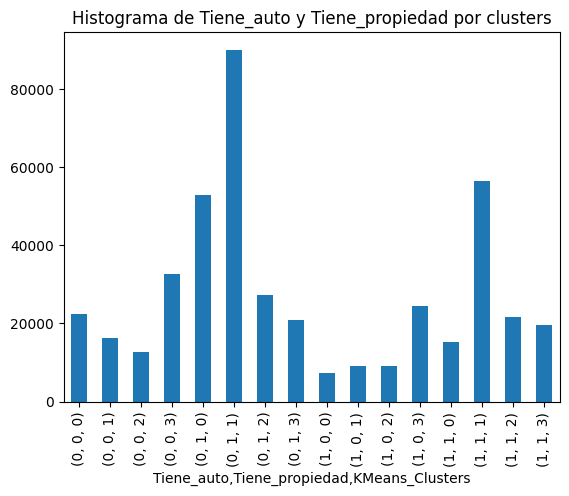

In [140]:
dataCredits = df.groupby(['Tiene_auto', 'Tiene_propiedad', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Tiene_auto y Tiene_propiedad por clusters')

<Axes: title={'center': 'Histograma de Tiene_auto por clusters'}, xlabel='Tiene_auto,KMeans_Clusters'>

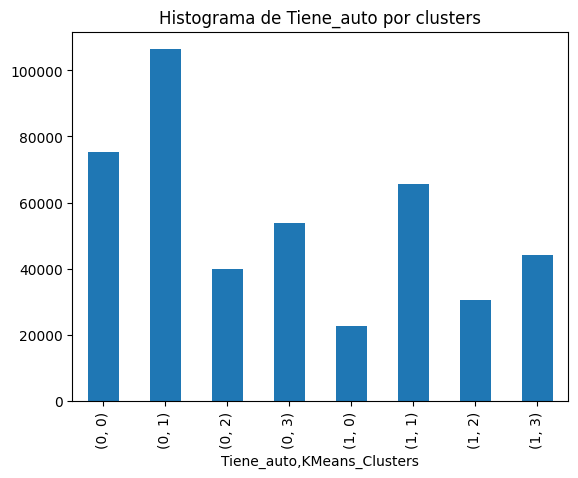

In [141]:
dataCredits = df.groupby(['Tiene_auto', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Tiene_auto por clusters')

<Axes: title={'center': 'Histograma de Estado_civil_Widow por clusters'}, xlabel='Estado_civil_Widow,KMeans_Clusters'>

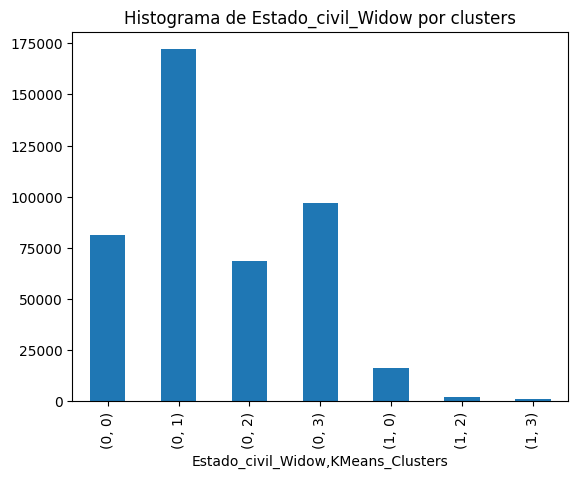

In [142]:
dataCredits = df.groupby(['Estado_civil_Widow', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estado_civil_Widow por clusters')

<Axes: title={'center': 'Histograma de Estado_civil_Single / not married por clusters'}, xlabel='Estado_civil_Single / not married,KMeans_Clusters'>

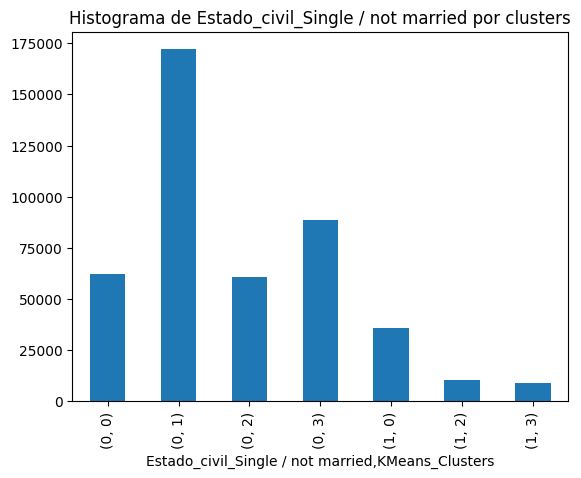

In [143]:
dataCredits = df.groupby(['Estado_civil_Single / not married', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estado_civil_Single / not married por clusters')

<Axes: title={'center': 'Histograma de Estado_civil_Separated por clusters'}, xlabel='Estado_civil_Separated,KMeans_Clusters'>

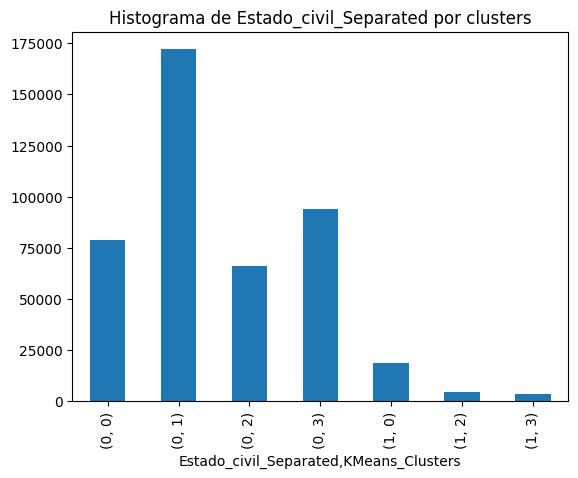

In [144]:
dataCredits = df.groupby(['Estado_civil_Separated', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estado_civil_Separated por clusters')

<Axes: title={'center': 'Histograma de Estado_civil_Married por clusters'}, xlabel='Estado_civil_Married,KMeans_Clusters'>

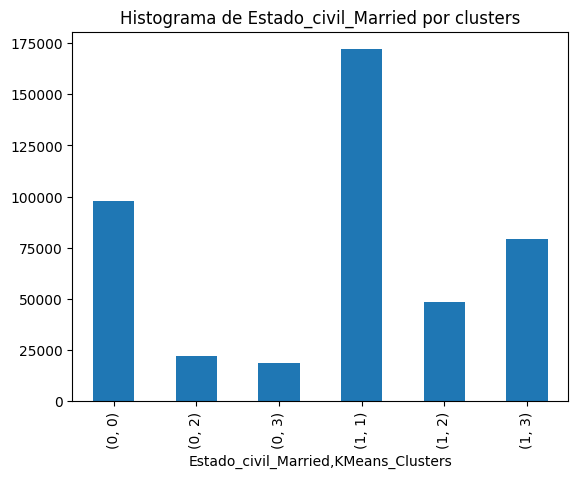

In [145]:
dataCredits = df.groupby(['Estado_civil_Married', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estado_civil_Married por clusters')

<Axes: title={'center': 'Histograma de Estado_civil_Civil marriage por clusters'}, xlabel='Estado_civil_Civil marriage,KMeans_Clusters'>

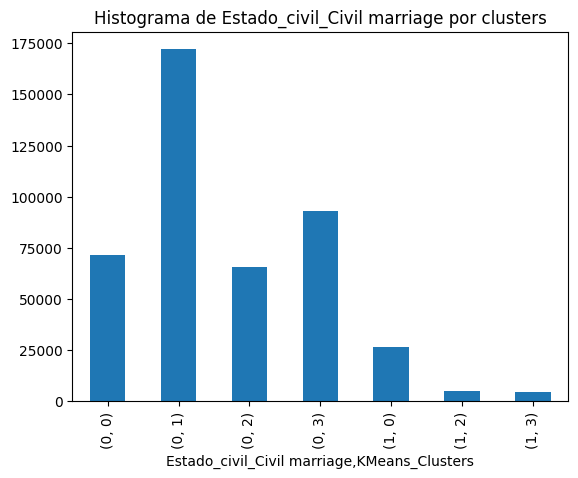

In [146]:
dataCredits = df.groupby(['Estado_civil_Civil marriage', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estado_civil_Civil marriage por clusters')

<Axes: title={'center': 'Histograma de Estudios_Secondary / secondary special por clusters'}, xlabel='Estudios_Secondary / secondary special,KMeans_Clusters'>

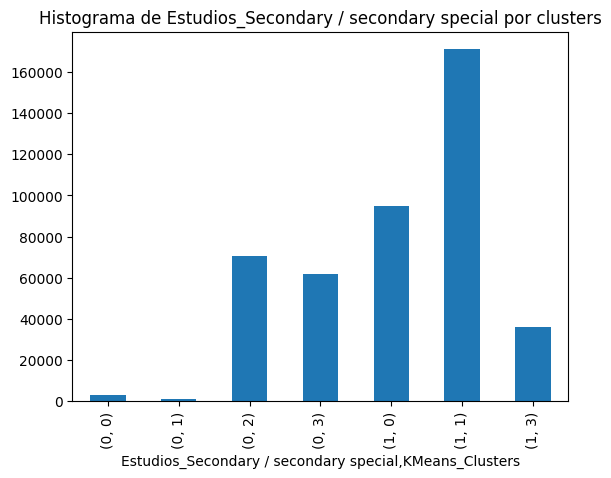

In [147]:
dataCredits = df.groupby(['Estudios_Secondary / secondary special', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estudios_Secondary / secondary special por clusters')

<Axes: title={'center': 'Histograma de Estudios_Lower secondary por clusters'}, xlabel='Estudios_Lower secondary,KMeans_Clusters'>

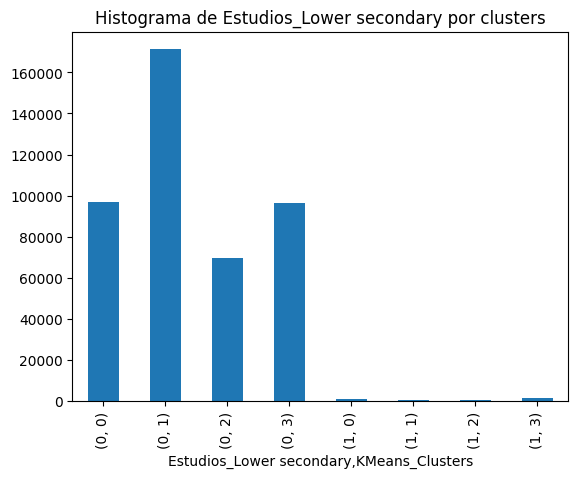

In [148]:
dataCredits = df.groupby(['Estudios_Lower secondary', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estudios_Lower secondary por clusters')

<Axes: title={'center': 'Histograma de Estudios_Incomplete higher por clusters'}, xlabel='Estudios_Incomplete higher,KMeans_Clusters'>

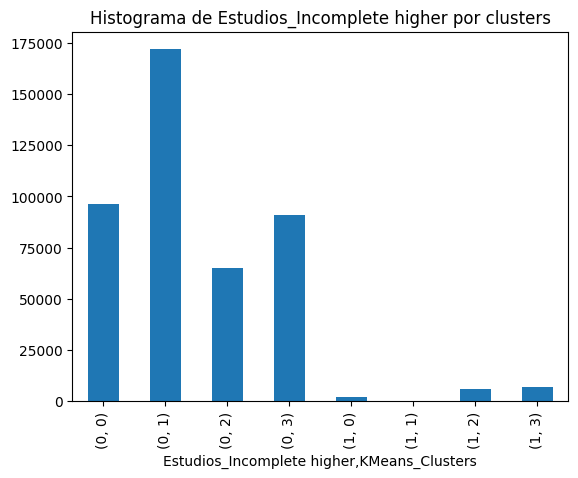

In [149]:
dataCredits = df.groupby(['Estudios_Incomplete higher', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estudios_Incomplete higher por clusters')

<Axes: title={'center': 'Histograma de Estudios_Higher education por clusters'}, xlabel='Estudios_Higher education,KMeans_Clusters'>

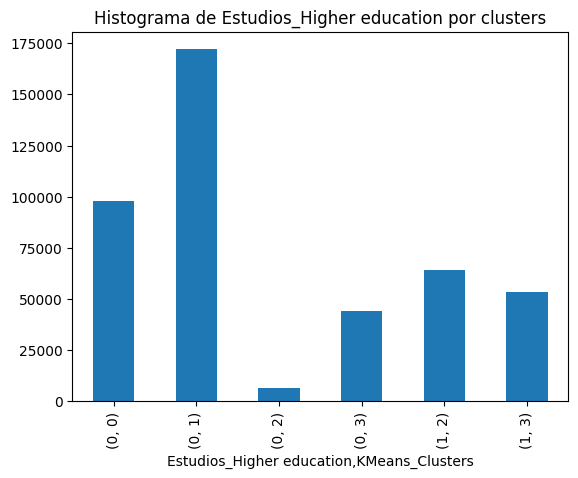

In [150]:
dataCredits = df.groupby(['Estudios_Higher education', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estudios_Higher education por clusters')

<Axes: title={'center': 'Histograma de Estudios_Academic degree por clusters'}, xlabel='Estudios_Academic degree,KMeans_Clusters'>

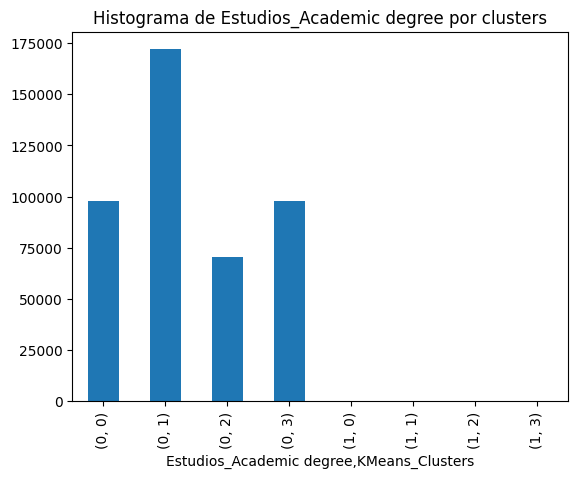

In [151]:
dataCredits = df.groupby(['Estudios_Academic degree', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estudios_Academic degree por clusters')

<Axes: title={'center': 'Histograma de Categoria_ingresos_State servant por clusters'}, xlabel='Categoria_ingresos_State servant,KMeans_Clusters'>

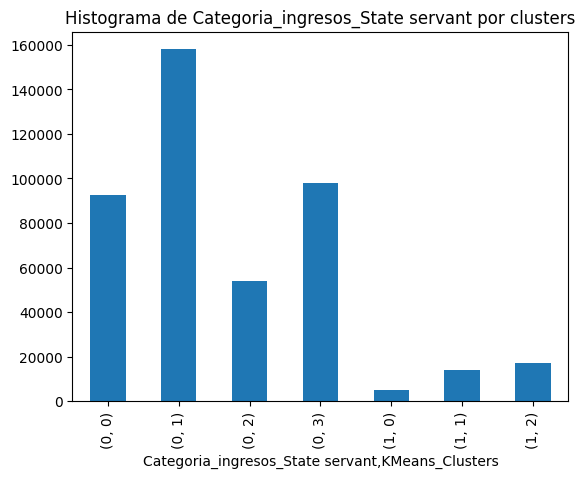

In [152]:
dataCredits = df.groupby(['Categoria_ingresos_State servant', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Categoria_ingresos_State servant por clusters')

<Axes: title={'center': 'Histograma de Categoria_ingresos_Working por clusters'}, xlabel='Categoria_ingresos_Working,KMeans_Clusters'>

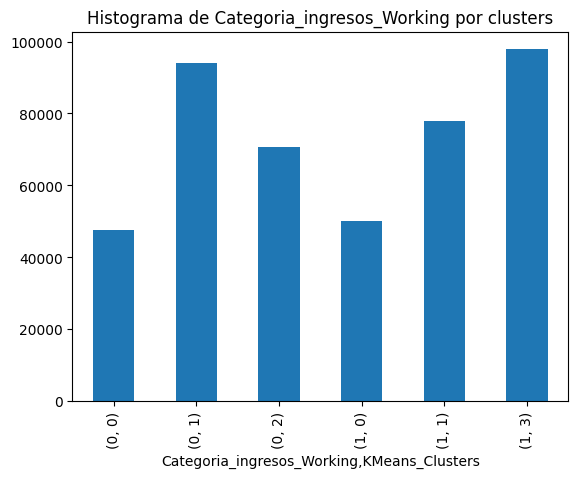

In [153]:
dataCredits = df.groupby(['Categoria_ingresos_Working', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Categoria_ingresos_Working por clusters')

<Axes: title={'center': 'Histograma de Categoria_ingresos_Pensioner por clusters'}, xlabel='Categoria_ingresos_Pensioner,KMeans_Clusters'>

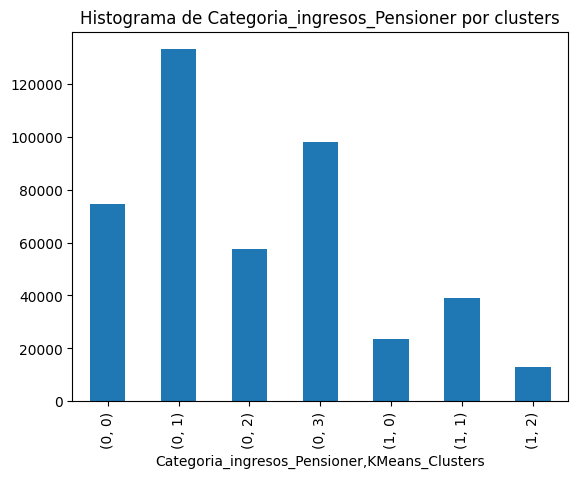

In [154]:
dataCredits = df.groupby(['Categoria_ingresos_Pensioner', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Categoria_ingresos_Pensioner por clusters')

<Axes: title={'center': 'Histograma de Categoria_ingresos_Commercial associate por clusters'}, xlabel='Categoria_ingresos_Commercial associate,KMeans_Clusters'>

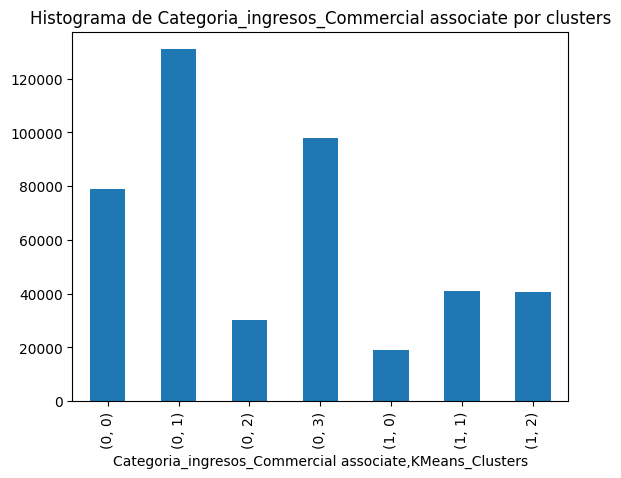

In [155]:
dataCredits = df.groupby(['Categoria_ingresos_Commercial associate', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Categoria_ingresos_Commercial associate por clusters')

<Axes: title={'center': 'Histograma de Categoria_ingresos_Student por clusters'}, xlabel='Categoria_ingresos_Student,KMeans_Clusters'>

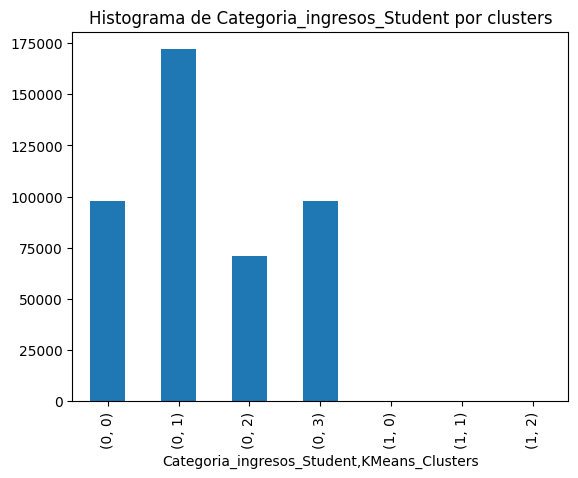

In [156]:
dataCredits = df.groupby(['Categoria_ingresos_Student', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Categoria_ingresos_Student por clusters')

<Axes: title={'center': 'Histograma de Estado_civil_Widow por clusters'}, xlabel='Estado_civil_Widow,KMeans_Clusters'>

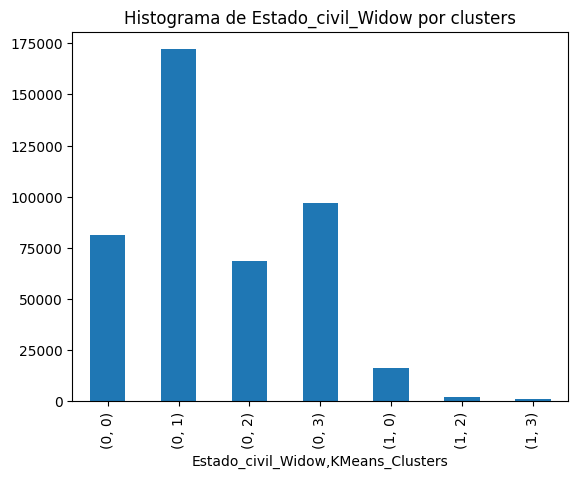

In [157]:
dataCredits = df.groupby(['Estado_civil_Widow', 'KMeans_Clusters']).size()
dataCredits.plot(kind='bar',title='Histograma de Estado_civil_Widow por clusters')

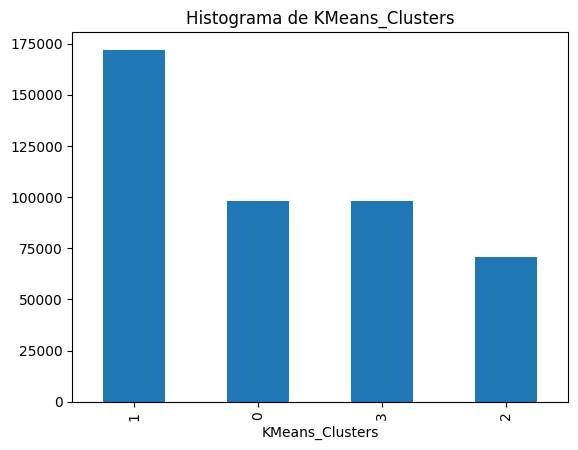

In [158]:
# Creamos y mostramos el histograma del atributo 'KMeans_Clusters'
plot = df['KMeans_Clusters'].value_counts().plot(kind='bar', title='Histograma de KMeans_Clusters')

In [159]:
df

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,...,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow,KMeans_Clusters
0,1,1,1,0,427500.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,3
1,1,1,1,0,427500.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,3
2,1,1,1,0,112500.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,0,1,0,270000.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,270000.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,1,0,135000.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
438553,0,0,0,0,103500.0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
438554,0,0,0,0,54000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2
438555,0,0,1,0,72000.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1


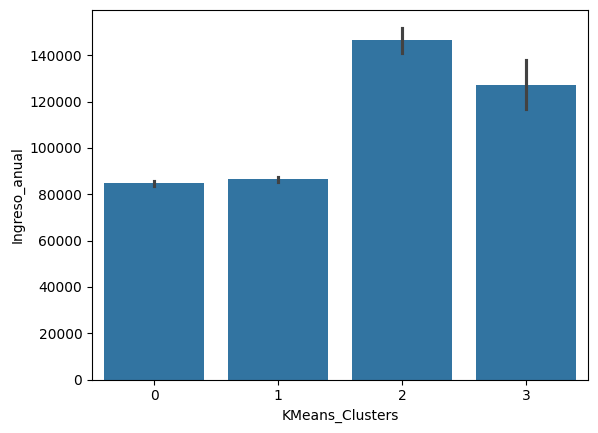

In [160]:
# grafica = plt.figure(figsize=(10,10))
sns.barplot(x='KMeans_Clusters',y='Ingreso_anual',data=df,estimator=np.std);

# Clasificación de los diferentes grupo
### Clusters 2 -> Grupo Oro
### Clusters 3 -> Grupo Plata
### Clusters 0 -> Grupo Bronce
### Clusters 1 -> Grupo Emergente

## CONCLUSIONES AL OBTENER LA AGRUPACIÓN
### Datos des-normalizados

In [161]:
# Informacion del dataframe des-normalizado
df_mean_desnormalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Categoria_ingresos_Commercial associate  438557 non-null  float64
 1   Categoria_ingresos_Pensioner             438557 non-null  float64
 2   Categoria_ingresos_State servant         438557 non-null  float64
 3   Categoria_ingresos_Student               438557 non-null  float64
 4   Categoria_ingresos_Working               438557 non-null  float64
 5   Estado_civil_Civil marriage              438557 non-null  float64
 6   Estado_civil_Married                     438557 non-null  float64
 7   Estado_civil_Separated                   438557 non-null  float64
 8   Estado_civil_Single / not married        438557 non-null  float64
 9   Estado_civil_Widow                       438557 non-null  float64
 10  Estudios_Academic degree        

In [162]:
df_mean_desnormalizados['KMeans_Clusters'].value_counts()

,count
KMeans_Clusters,
1,172006
0,97950
3,97868
2,70733


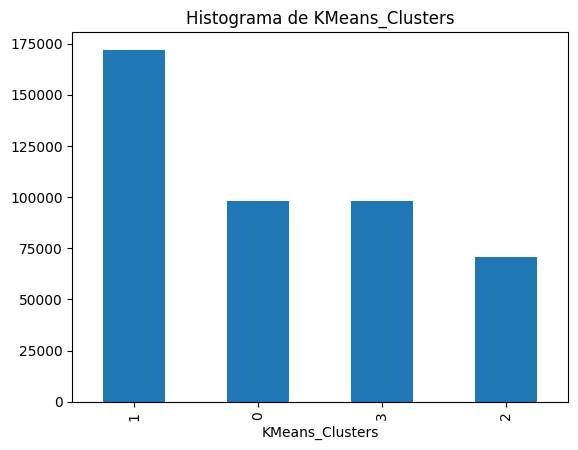

In [163]:
# Creamos y mostramos el histograma del atributo 'KMeans_Clusters'
plot = df_mean_desnormalizados['KMeans_Clusters'].value_counts().plot(kind='bar', title='Histograma de KMeans_Clusters')

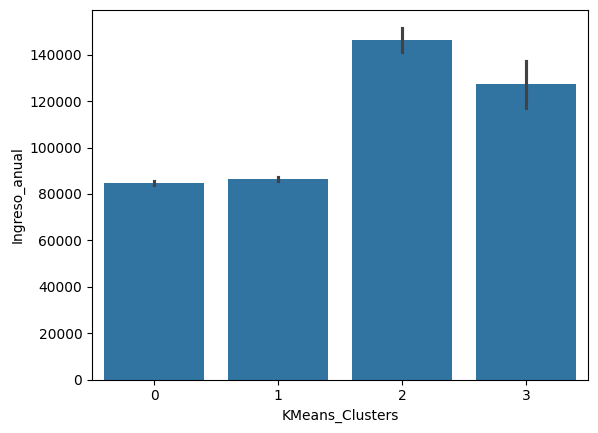

In [164]:
# grafica = plt.figure(figsize=(10,10))
sns.barplot(x='KMeans_Clusters',y='Ingreso_anual',data=df_mean_desnormalizados,estimator=np.std);

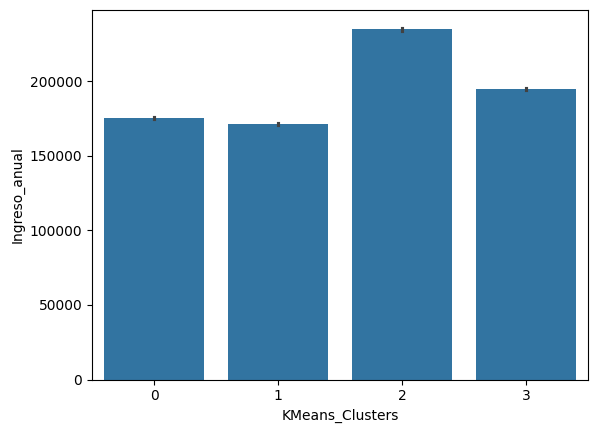

In [165]:
# grafica = plt.figure(figsize=(10,10))
sns.barplot(x='KMeans_Clusters',y='Ingreso_anual',data=df);

In [166]:
df_mean_desnormalizados[df_mean_desnormalizados["KMeans_Clusters"] == 0]

,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Civil marriage,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow,...,Estudios_Higher education,Estudios_Incomplete higher,Estudios_Lower secondary,Estudios_Secondary / secondary special,Genero,Ingreso_anual,KMeans_Clusters,Num_hijos,Tiene_auto,Tiene_propiedad
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,270000.0,0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,270000.0,0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,270000.0,0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,270000.0,0,0.0,0.0,1.0
24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,112500.0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,135000.0,0,0.0,0.0,1.0
438550,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,135000.0,0,0.0,0.0,1.0
438551,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,135000.0,0,0.0,0.0,1.0
438552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,135000.0,0,0.0,0.0,1.0


In [172]:
df_mean_desnormalizados[df_mean_desnormalizados['KMeans_Clusters'] == 1]['Ingreso_anual'].mean()

np.float64(171175.53665279117)